# London Housing Price Analysis
***by Katia Lopes-Gilbert, February 2024***

## Springboard Data Science Career Track Unit 4 Challenge - Tier 3

## Project Overview
I've been tasked with analyzing housing price data from the borough of Greater London. I am specifically interested in answering the following question: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***

I've been provided guidance to refer to to the 32 borough within Greater London per the [(London Boroughs Wikipedia page)](https://en.wikipedia.org/wiki/London_boroughs).

This project will make use of what I learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge will require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## Applying The Data Science Pipeline

My Data Science project will adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 

### 1. Sourcing and Loading 

I'll be using the following libraries for my project:
* pandas
* NumPy
* Matplotlib
* datetime
* Seaborn

#### 1.1. Importing Libraries

In [1]:
# import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
The data I'll be using comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# make a variable call to the london housing dataset

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file

# assign this data into a variable called properties 
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing

The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and we will also tranform the data before visualization.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 

**2.1. Exploring your data** 

I want to take a look at the dataset in its initial form prior to making any changes. 

In [3]:
# checkout the first few rows of data
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


Okay, so already I can see I will want to eventually melt this dataset to have each borough in a row under a new column called borough and each instance of a date be it's own column with average prices as the values for that date instance that I will want to analyze. 

In [4]:
# check out column names
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            348 non-null    datetime64[ns]
 1   City of London        349 non-null    object        
 2   Barking & Dagenham    349 non-null    object        
 3   Barnet                349 non-null    object        
 4   Bexley                349 non-null    object        
 5   Brent                 349 non-null    object        
 6   Bromley               349 non-null    object        
 7   Camden                349 non-null    object        
 8   Croydon               349 non-null    object        
 9   Ealing                349 non-null    object        
 10  Enfield               349 non-null    object        
 11  Greenwich             349 non-null    object        
 12  Hackney               349 non-null    object        
 13  Hammersmith & Fulham

In [5]:
properties.describe()

,Unnamed: 0,Unnamed: 34,Unnamed: 37,Unnamed: 47
count,348,0.0,0.0,0.0
mean,2009-06-16 07:43:26.896551680,NaN,NaN,NaN
min,1995-01-01 00:00:00,NaN,NaN,NaN
25%,2002-03-24 06:00:00,NaN,NaN,NaN
50%,2009-06-16 00:00:00,NaN,NaN,NaN
75%,2016-09-08 12:00:00,NaN,NaN,NaN
max,2023-12-01 00:00:00,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN


### **Initial Observations**

**Null Values** The properties dataset has several columns that are solely null values: 'Unnamed: 34', 'Unnamed: 37', and 'Unnamed: 47'. These will have to be deleted.

**Irrelevant Values** As mentioned above, accoring to Wikipedia, there are only 32 London Boroughs. Some of the geographical areas listed are not actually borough. They seem to be regions, for example, East Midlands. Additionally, since the boroughs have unique names, the id values will not provide much for analysis or answering my question of interest. 

**Intersting Values** Also, two other geographical areas have been included that are technically not borough, but may be interesting for analysis: City of London and England. 

**Data Transformation** Additionally, I will want to do the folloing transformation to prep the data for analysis:
* Organize columns by variables: burough, date, avg-price. This will allow for more machine-readable data. 
* Convert all the numerical values from objects into integers. 
* Ensure all date values are datetime objects

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [6]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [7]:
# remove unnecessary columns
properties.drop(columns=['Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'], inplace=True)

In [8]:
# verify columns have been removed
removed_columns = ['Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'] # identify the removed columns by name
properties.columns.isin(removed_columns)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [9]:
# checking for null values in the dataset
properties.isna().sum()

Unnamed: 0              1
City of London          0
Barking & Dagenham      0
Barnet                  0
Bexley                  0
Brent                   0
Bromley                 0
Camden                  0
Croydon                 0
Ealing                  0
Enfield                 0
Greenwich               0
Hackney                 0
Hammersmith & Fulham    0
Haringey                0
Harrow                  0
Havering                0
Hillingdon              0
Hounslow                0
Islington               0
Kensington & Chelsea    0
Kingston upon Thames    0
Lambeth                 0
Lewisham                0
Merton                  0
Newham                  0
Redbridge               0
Richmond upon Thames    0
Southwark               0
Sutton                  0
Tower Hamlets           0
Waltham Forest          0
Wandsworth              0
Westminster             0
Inner London            0
Outer London            0
NORTH EAST              0
NORTH WEST              0
YORKS & THE 

The unnamed column which contains date values has one null value in the row that contains id data. I will remove that row since I will not be needing it for analysis. 

In [10]:
# drop the first row containing a null value and id numbers
properties.drop([0], inplace=True)
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,42369.72984,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,42095.8436,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,53590.8548
5,1995-05-01,84409.14932,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,...,43266.45165,44223.61973,44830.98563,45878.00396,50369.66188,56479.80183,75432.02786,64530.36358,54698.83831,53678.24041


In [11]:
# rename 'Unnamed: 0' column to 'date'
# properties.rename(columns={'Unnamed: 0':'date'}, inplace=True)
# properties.columns

In [12]:
# tranposing df to have boroughs in rows vs. columns and resetting the index
properties_transposed = properties.transpose().reset_index()
properties_transposed.head()

,index,1,2,3,4,5,6,7,8,9,...,339,340,341,342,343,344,345,346,347,348
0,Unnamed: 0,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00
1,City of London,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,926023,900447,960485,995816,973945,909574,886619,884062,839079,802168
2,Barking & Dagenham,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,343471,346218,347481,343944,341264,341115,338301,338600,343037,340485
3,Barnet,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,597927,588354,572839,569078,574332,584285,587519,581031,582184,577548
4,Bexley,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,395215,394399,388948,387261,390037,388763,389314,383637,386701,377926


In [13]:
# set first row as the column names

# identify the first row to use for column names
new_headers = properties_transposed.iloc[0]

# subset the rest of the dataframe
properties_transposed = properties_transposed[1:]

# replace column headers with the new headers
properties_transposed.columns = new_headers

# verfiy columns have been changed
properties_transposed.head(2)

,Unnamed: 0,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00
1,City of London,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,926023,900447,960485,995816,973945,909574,886619,884062,839079,802168
2,Barking & Dagenham,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,343471,346218,347481,343944,341264,341115,338301,338600,343037,340485


In [14]:
# rename burough column
properties_transposed.rename(columns={'Unnamed: 0': 'borough'}, inplace=True)
properties_transposed.head()

,borough,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00
1,City of London,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,926023,900447,960485,995816,973945,909574,886619,884062,839079,802168
2,Barking & Dagenham,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,343471,346218,347481,343944,341264,341115,338301,338600,343037,340485
3,Barnet,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,597927,588354,572839,569078,574332,584285,587519,581031,582184,577548
4,Bexley,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,395215,394399,388948,387261,390037,388763,389314,383637,386701,377926
5,Brent,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,73789.54287,...,529085,530652,528250,528734,523159,544681,546336,558495,546598,526198


**2.4.Transforming the data**

Okay, now that I have cleaned up my rows and columns, it is time to melt my DataFrame!


In [15]:
# melt dataframe to have the following columns: borough, date, and average price
properties_transformed = properties_transposed.melt(id_vars='borough', var_name='date', value_name='avg_price')
properties_transformed.head()

,borough,date,avg_price
0,City of London,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,1995-01-01 00:00:00,50460.2266
2,Barnet,1995-01-01 00:00:00,93284.51832
3,Bexley,1995-01-01 00:00:00,64958.09036
4,Brent,1995-01-01 00:00:00,71306.56698


In [16]:
# checkout new dataframe information
properties_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15660 entries, 0 to 15659
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   borough    15660 non-null  object
 1   date       15660 non-null  object
 2   avg_price  15660 non-null  object
dtypes: object(3)
memory usage: 367.2+ KB


Ok this is looking a lot better. I still have a few things left to do before analyzing the data:
1. Convert the date column to datetime objects.
2. Remove the timestamps from the date column as this is irrelevant information.
3. Convert the average price column values to integer objects.

In [17]:
# import datetime and date from datetime library
from datetime import datetime, date

# convert date to datetime objects
properties_transformed['date'] = pd.to_datetime(properties_transformed['date'])
print(properties_transformed.head())
print()
print(properties_transformed.info())

              borough       date    avg_price
0      City of London 1995-01-01  91448.98487
1  Barking & Dagenham 1995-01-01   50460.2266
2              Barnet 1995-01-01  93284.51832
3              Bexley 1995-01-01  64958.09036
4               Brent 1995-01-01  71306.56698

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15660 entries, 0 to 15659
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   borough    15660 non-null  object        
 1   date       15660 non-null  datetime64[ns]
 2   avg_price  15660 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 367.2+ KB
None


In [18]:
# convert avg_price to integer objects
properties_transformed['avg_price'] = properties_transformed['avg_price'].astype(int)
properties_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15660 entries, 0 to 15659
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   borough    15660 non-null  object        
 1   date       15660 non-null  datetime64[ns]
 2   avg_price  15660 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 367.2+ KB


In [19]:
properties_clean = properties_transformed
properties_clean.head()

,borough,date,avg_price
0,City of London,1995-01-01,91448
1,Barking & Dagenham,1995-01-01,50460
2,Barnet,1995-01-01,93284
3,Bexley,1995-01-01,64958
4,Brent,1995-01-01,71306


I want to add two new columns that may be useful for further analysis later, a month column and a year column.

In [20]:
properties_clean['month'] = properties_clean['date'].dt.month
properties_clean['year'] = properties_clean['date'].dt.year
properties_clean.head()

,borough,date,avg_price,month,year
0,City of London,1995-01-01,91448,1,1995
1,Barking & Dagenham,1995-01-01,50460,1,1995
2,Barnet,1995-01-01,93284,1,1995
3,Bexley,1995-01-01,64958,1,1995
4,Brent,1995-01-01,71306,1,1995


**Subsetting DataFrame to only inlcude actual London Boroughs**

Okay so now I will want to subset the data to only include the actual London boroughs. I may use the other geographical regions for analysis later, so I'll keep the properties_cleaned data for future reference. 

According to Wikipedia, the London borough are:

*City of Westminster, Kensington and Chelsea, Hammersmith and Fulham, Wandsworth, Lambeth, Southwark, Tower Hamlets, Hackney, Islington, Camden, Brent, Ealing, Hounslow, Richmond upon Thames, Kingston upon Thames, Merton, Sutton, Croydon, Bromley, Lewisham, Greenwich, Bexley, Havering, Barking and Dagenham, Redbridge, Newham, Waltham Forest, Haringey, Enfield, Barnet, Harrow, Hillingdon.*

In [21]:
# create list of london burough names
london_borough_names = ['City of Westminster', 'Kensington & Chelsea', 'Hammersmith & Fulham', 'Wandsworth', 'Lambeth', 'Southwark',
                        'Tower Hamlets', 'Hackney', 'Islington', 'Camden', 'Brent', 'Ealing', 'Hounslow', 'Richmond upon Thames', 
                        'Kingston upon Thames', 'Merton', 'Sutton', 'Croydon', 'Bromley', 'Lewisham', 'Greenwich', 'Bexley', 'Havering',
                        'Barking & Dagenham', 'Redbridge', 'Newham', 'Waltham Forest', 'Haringey', 'Enfield', 'Barnet', 'Harrow', 
                        'Hillingdon']

# subset dataframe with the rows that align with actual london borough
london_boroughs = properties_clean[properties_clean['borough'].isin(london_borough_names)]


# check the number of borough
print(london_boroughs['borough'].nunique())

# check the burough names
print(london_boroughs['borough'].unique())

31
['Barking & Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney' 'Hammersmith & Fulham'
 'Haringey' 'Harrow' 'Havering' 'Hillingdon' 'Hounslow' 'Islington'
 'Kensington & Chelsea' 'Kingston upon Thames' 'Lambeth' 'Lewisham'
 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames' 'Southwark' 'Sutton'
 'Tower Hamlets' 'Waltham Forest' 'Wandsworth']


I am missing a burough. I need to figure out which one. 

In [22]:
# create df containing current unique burough names
dataset_borough = properties_clean['borough'].unique()
borough_df = pd.DataFrame(dataset_borough, columns=['og_borough'])

In [23]:
# convert london borough list to a df to join with my df_borough and find the missing burough
london_df = pd.DataFrame(london_borough_names, columns=['actual_borough'])

# join the dataframes
borough_verification = london_df.merge(borough_df, how='left', left_on='actual_borough', right_on='og_borough')
borough_verification

,actual_borough,og_borough
0,City of Westminster,NaN
1,Kensington & Chelsea,Kensington & Chelsea
2,Hammersmith & Fulham,Hammersmith & Fulham
3,Wandsworth,Wandsworth
4,Lambeth,Lambeth
5,Southwark,Southwark
6,Tower Hamlets,Tower Hamlets
7,Hackney,Hackney
8,Islington,Islington
9,Camden,Camden


The discrepency is with Westminster. Wikipedia refers to this burough as 'City of Westminster' vs the dataset I pulled information from says 'Westminster'. This is an easy fix!

In [24]:
# modify list of london burough names
london_borough_names = ['Westminster', 'Kensington & Chelsea', 'Hammersmith & Fulham', 'Wandsworth', 'Lambeth', 'Southwark',
                        'Tower Hamlets', 'Hackney', 'Islington', 'Camden', 'Brent', 'Ealing', 'Hounslow', 'Richmond upon Thames', 
                        'Kingston upon Thames', 'Merton', 'Sutton', 'Croydon', 'Bromley', 'Lewisham', 'Greenwich', 'Bexley', 'Havering',
                        'Barking & Dagenham', 'Redbridge', 'Newham', 'Waltham Forest', 'Haringey', 'Enfield', 'Barnet', 'Harrow', 
                        'Hillingdon']

# subset dataframe again
london_borough = properties_clean[properties_clean['borough'].isin(london_borough_names)].copy()

# check the number of borough
print(london_borough['borough'].nunique())

32


In [25]:
# checking out the first few rows of data
london_borough.head(10)

,borough,date,avg_price,month,year
1,Barking & Dagenham,1995-01-01,50460,1,1995
2,Barnet,1995-01-01,93284,1,1995
3,Bexley,1995-01-01,64958,1,1995
4,Brent,1995-01-01,71306,1,1995
5,Bromley,1995-01-01,81671,1,1995
6,Camden,1995-01-01,120932,1,1995
7,Croydon,1995-01-01,69158,1,1995
8,Ealing,1995-01-01,79885,1,1995
9,Enfield,1995-01-01,72514,1,1995
10,Greenwich,1995-01-01,62300,1,1995


In [26]:
# checking out some summary statistics
london_borough_summary_stats = london_borough.groupby(['borough', 'year']).agg({'avg_price':['min', 'max', 'mean', 'median', 'std']}).round()
london_borough_summary_stats

avg_price                                        
                              min      max       mean     median      std
borough            year                                                  
Barking & Dagenham 1995     50460    53700    51818.0    51492.0   1028.0
                   1996     50621    53853    51718.0    51730.0    900.0
                   1997     54459    58024    55974.0    55554.0   1140.0
                   1998     57360    63487    60285.0    60497.0   1947.0
                   1999     63528    68812    65320.0    64812.0   1574.0
...                           ...      ...        ...        ...      ...
Westminster        2019    905951  1021532   955998.0   953286.0  34998.0
                   2020    902768  1026785   960469.0   951190.0  45383.0
                   2021    859417  1049442   962777.0   947284.0  61970.0
                   2022    974993  1063028  1016766.0  1011270.0  34262.0
                   2023    877733  1109748  1006072.0  1025332.0  71710.0

[928 rows x 5 columns]

**2.6. Visualizing the data**

In [27]:
# create a pivot to show the average home price per year for each burough
avg_price_by_city_vs_year = london_borough.pivot_table(values='avg_price', index='borough', columns='year').round()


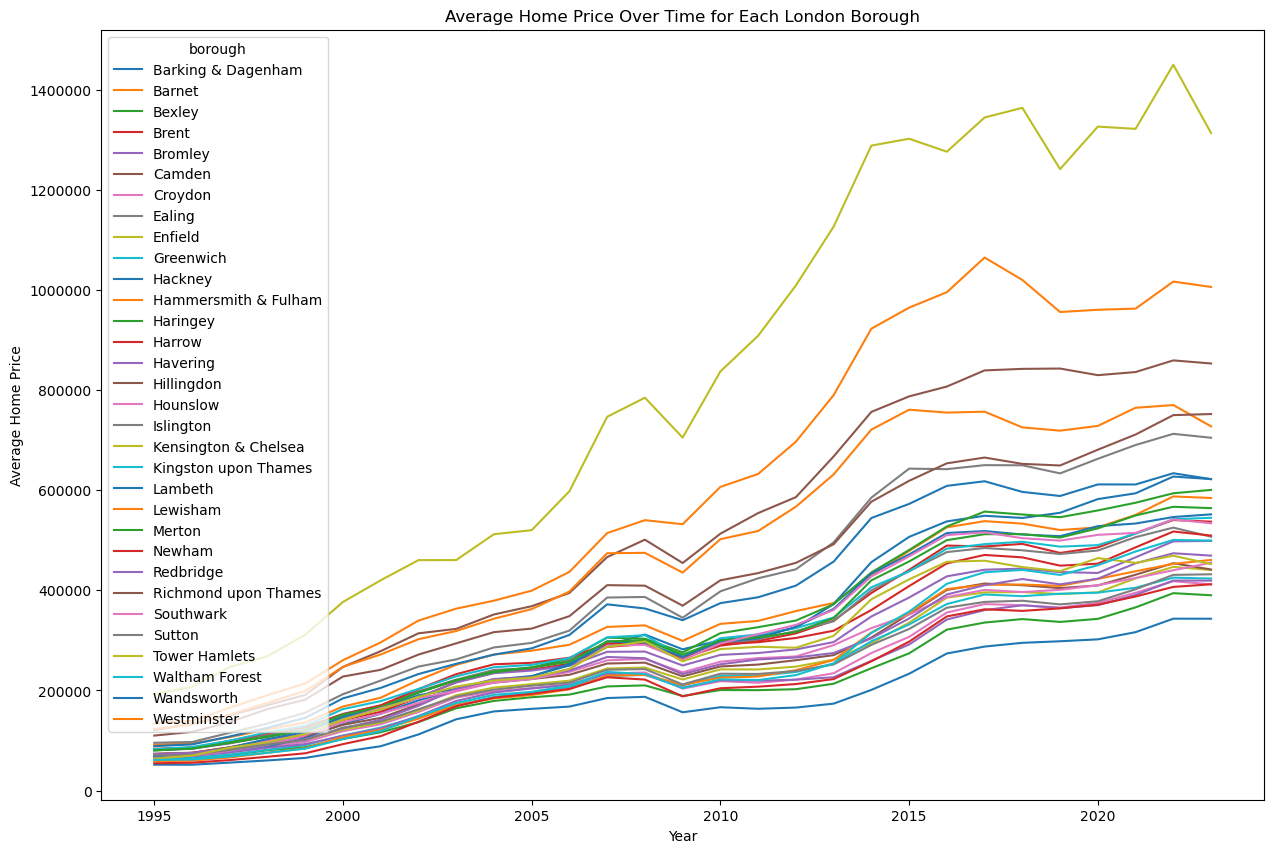

In [28]:
avg_price_by_city_vs_year.T.plot(figsize=(15,10))
plt.title('Average Home Price Over Time for Each London Borough')
plt.xlabel('Year')
plt.ylabel('Average Home Price')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

### Observation

The average home price for homes in London Boroughs has increased pretty significantly over the last 28 years across all boroughs. It does seem like certain boroughs experienced higher increases YOY.  

I'll continue with various calculations to determine which boroughs experienced the highest increases in average home price since 1995. 

In [29]:
# subset london borough dataset to only include information for 1995 and 2023
boroughs_subset_1995_2023 = london_boroughs[london_boroughs['year'].isin([1995, 2023])]

# group by borogh name and year
boroughs_subset_avg_price = boroughs_subset_1995_2023.pivot_table(values='avg_price', index='borough', columns='year', aggfunc='mean').round().reset_index()

boroughs_subset_avg_price_srt = boroughs_subset_avg_price.sort_values(2023, ascending=False)
boroughs_subset_avg_price_srt


year,borough,1995,2023
18,Kensington & Chelsea,192857.0,1313421.0
5,Camden,120367.0,853200.0
25,Richmond upon Thames,109892.0,752191.0
11,Hammersmith & Fulham,123238.0,727586.0
17,Islington,95555.0,704825.0
10,Hackney,66024.0,622262.0
30,Wandsworth,88829.0,622169.0
12,Haringey,80078.0,600636.0
1,Barnet,91792.0,584510.0
22,Merton,80500.0,564255.0


I'm interested in looking at the percent change in average price for each borough between 1995 and 2023. I also want to look at the change in Great British Pound (gbp) value between those years. 

In [30]:
# calculate percent change in average price for each borough between 2 years
boroughs_subset_avg_price['perc_change'] = (((boroughs_subset_avg_price[2023] - boroughs_subset_avg_price[1995])/ boroughs_subset_avg_price[1995]) * 100).round()

# calculate the change in gbp for each boroguh between the 2 years
boroughs_subset_avg_price['gbp_change'] = boroughs_subset_avg_price[2023] - boroughs_subset_avg_price[1995]

# sorty by percent change in descending order
boroughs_subset_avg_price.sort_values('perc_change', ascending=False)

year,borough,1995,2023,perc_change,gbp_change
10,Hackney,66024.0,622262.0,842.0,556238.0
26,Southwark,64260.0,534024.0,731.0,469764.0
29,Waltham Forest,61280.0,499472.0,715.0,438192.0
20,Lambeth,68105.0,551811.0,710.0,483706.0
21,Lewisham,58881.0,460777.0,683.0,401896.0
23,Newham,54574.0,412149.0,655.0,357575.0
12,Haringey,80078.0,600636.0,650.0,520558.0
17,Islington,95555.0,704825.0,638.0,609270.0
3,Brent,73030.0,537189.0,636.0,464159.0
28,Tower Hamlets,63652.0,452537.0,611.0,388885.0


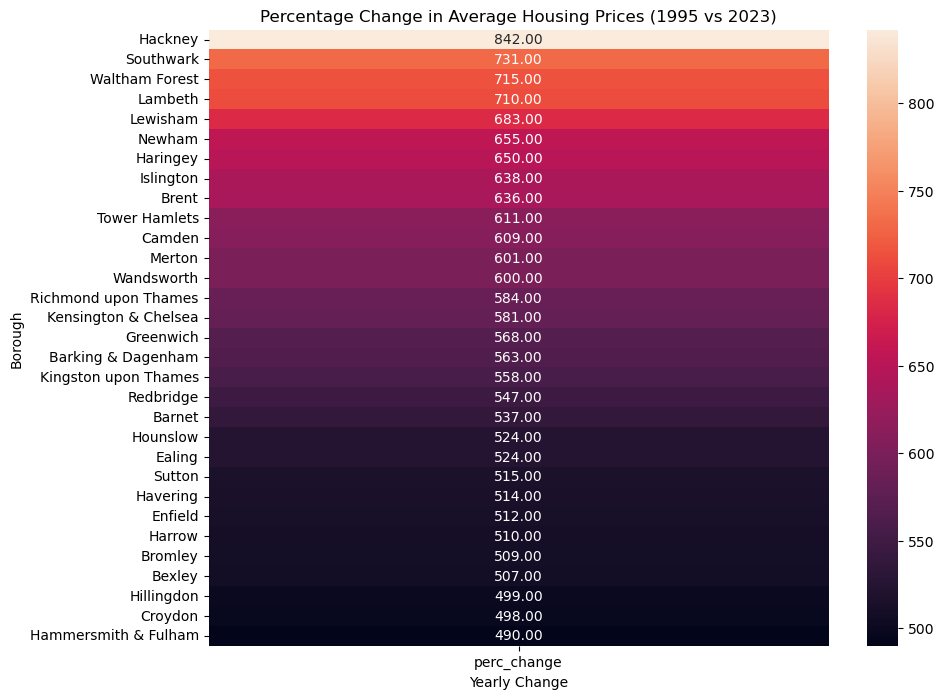

In [31]:
# import seaborn to create heatmap visualziation
import seaborn as sns

# subset data for the borough name and percent change column
heatmap_data = boroughs_subset_avg_price[['borough', 'perc_change']].sort_values('perc_change', ascending=False).set_index('borough')

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=heatmap_data, annot=True, fmt=".2f")

plt.title('Percentage Change in Average Housing Prices (1995 vs 2023)')
plt.xlabel('Yearly Change')
plt.ylabel('Borough')

plt.show()

In [32]:
# sort by the borough with the greatest change in price (in Great British Pounds)
gbp_srt = boroughs_subset_avg_price.sort_values('gbp_change', ascending=False)
gbp_srt.head(10)

year,borough,1995,2023,perc_change,gbp_change
18,Kensington & Chelsea,192857.0,1313421.0,581.0,1120564.0
5,Camden,120367.0,853200.0,609.0,732833.0
25,Richmond upon Thames,109892.0,752191.0,584.0,642299.0
17,Islington,95555.0,704825.0,638.0,609270.0
11,Hammersmith & Fulham,123238.0,727586.0,490.0,604348.0
10,Hackney,66024.0,622262.0,842.0,556238.0
30,Wandsworth,88829.0,622169.0,600.0,533340.0
12,Haringey,80078.0,600636.0,650.0,520558.0
1,Barnet,91792.0,584510.0,537.0,492718.0
22,Merton,80500.0,564255.0,601.0,483755.0


**3. Modeling**

Per project instructions, I wrote a function that will calculate a ratio of house prices, comparing the price of a house in 2023 to the price in 1995.

This function will:
1. Take a filter of the London boroughs DataFrame, specifically where this filter constrains the borough, as an argument.
2. Get the Average Price for that Borough, for the years 1995 and 2023.
4. Calculate the ratio of the Average Price for 1995 divided by the Average Price for 2023.
5. Return that ratio.

I'll then iterate through all the unique London boroughs and work out the ratio capturing the difference of house prices between 1995 and 2023.

In [33]:
def create_price_ratio(borough_name, year_1, year_2):    
    
    # subset london_bouroughs by burough_name, year_1 and year_2
    df = london_borough[(london_borough['borough'] == borough_name) & (london_borough['year'].isin([year_1, year_2]))]

    # compute the mean for average price for year_1 and year_2
    avg_price = df.groupby('year')['avg_price'].mean().round(4)
    
    # compute the price ration for year_1 over year_2
    ratio = (avg_price[year_1] / avg_price[year_2]).round(4)

    return ratio


In [34]:
# testing my new function
ken_chel_ratio = create_price_ratio('Kensington & Chelsea', 1995, 2023)
print(ken_chel_ratio)

0.1468


In [35]:
price_comp_dict = {}

borough_names = list(london_borough['borough'].unique())

for borough in borough_names:
    price_comp_dict[borough] = create_price_ratio(borough, 1995, 2023)

print(price_comp_dict)

{'Barking & Dagenham': 0.1509, 'Barnet': 0.157, 'Bexley': 0.1648, 'Brent': 0.1359, 'Bromley': 0.1643, 'Camden': 0.1411, 'Croydon': 0.1673, 'Ealing': 0.1601, 'Enfield': 0.1633, 'Greenwich': 0.1497, 'Hackney': 0.1061, 'Hammersmith & Fulham': 0.1694, 'Haringey': 0.1333, 'Harrow': 0.1639, 'Havering': 0.1628, 'Hillingdon': 0.167, 'Hounslow': 0.1602, 'Islington': 0.1356, 'Kensington & Chelsea': 0.1468, 'Kingston upon Thames': 0.152, 'Lambeth': 0.1234, 'Lewisham': 0.1278, 'Merton': 0.1427, 'Newham': 0.1324, 'Redbridge': 0.1546, 'Richmond upon Thames': 0.1461, 'Southwark': 0.1203, 'Sutton': 0.1627, 'Tower Hamlets': 0.1407, 'Waltham Forest': 0.1227, 'Wandsworth': 0.1428, 'Westminster': 0.1329}


In [36]:
ratio_df = pd.DataFrame.from_dict(price_comp_dict, orient='index', columns=['price_ratio'])
ratio_df.sort_values('price_ratio').head(5)

,price_ratio
Hackney,0.1061
Southwark,0.1203
Waltham Forest,0.1227
Lambeth,0.1234
Lewisham,0.1278


In [37]:
# join ratio dataframe with average prices
ratio_avg_prices = boroughs_subset_avg_price.merge(ratio_df, left_on='borough', right_index=True)
ratio_avg_prices_srt = ratio_avg_prices.sort_values(['price_ratio'])
ratio_avg_prices_srt

,borough,1995,2023,perc_change,gbp_change,price_ratio
10,Hackney,66024.0,622262.0,842.0,556238.0,0.1061
26,Southwark,64260.0,534024.0,731.0,469764.0,0.1203
29,Waltham Forest,61280.0,499472.0,715.0,438192.0,0.1227
20,Lambeth,68105.0,551811.0,710.0,483706.0,0.1234
21,Lewisham,58881.0,460777.0,683.0,401896.0,0.1278
23,Newham,54574.0,412149.0,655.0,357575.0,0.1324
12,Haringey,80078.0,600636.0,650.0,520558.0,0.1333
17,Islington,95555.0,704825.0,638.0,609270.0,0.1356
3,Brent,73030.0,537189.0,636.0,464159.0,0.1359
28,Tower Hamlets,63652.0,452537.0,611.0,388885.0,0.1407


In [38]:
top_5_change = ratio_avg_prices_srt[['borough', 'price_ratio']].head(5)
top_5_change

,borough,price_ratio
10,Hackney,0.1061
26,Southwark,0.1203
29,Waltham Forest,0.1227
20,Lambeth,0.1234
21,Lewisham,0.1278


### Top 5 Most Expensive Boroughs

In [39]:
# subset the boroughs dataset for the boroughs and their average price in 2023
top_5_price = boroughs_subset_avg_price_srt[['borough', 2023]].head(5)

# turn the result into a list of the top 5 most expensive boroughs
top_5_price['borough'].to_list()

['Kensington & Chelsea',
 'Camden',
 'Richmond upon Thames',
 'Hammersmith & Fulham',
 'Islington']

In [40]:
# check out the average price for each of the top 5 most expensive boroughs in 2023
top_5_price[['borough', 2023]]

year,borough,2023
18,Kensington & Chelsea,1313421.0
5,Camden,853200.0
25,Richmond upon Thames,752191.0
11,Hammersmith & Fulham,727586.0
17,Islington,704825.0


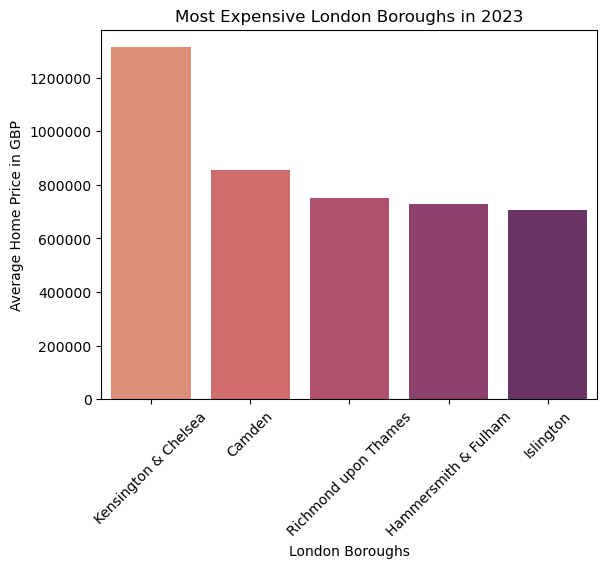

In [41]:
# plot the average prices for the top 5 boroughs
ax = sns.barplot(data=top_5_price, x='borough', y=2023, palette='flare')

# format plot
ax.set_title('Most Expensive London Boroughs in 2023')
ax.set_ylabel('Average Home Price in GBP')
ax.set_xlabel('London Boroughs')
ax.tick_params(axis='x', labelrotation=45)
ax.ticklabel_format(style='plain', axis='y')

### Comparing average home prices in 2023 for the most expensive boroughs and the boroughs that experienced the largest growth in prices since 1195

In [42]:
# create list of boroughs of interest
boroughs_to_invest = ['Hackney', 'Southwark', 'Waltham Forest', 'Lambeth', 'Lewisham', 'Kensington & Chelsea', 'Camden', 'Richmond upon Thames',
 'Hammersmith & Fulham', 'Islington']

# subset the data with the boroughs of interest
recent_house_prices = boroughs_subset_avg_price[boroughs_subset_avg_price['borough'].isin(boroughs_to_invest)]
recent_house_prices_srt = recent_house_prices[['borough', 2023]].sort_values(2023)

In [43]:
# split the list based on the most expensive and the highest growth over time and calculate average cost for each group
affordable_homes = recent_house_prices_srt[2023].head(5).mean()
expensive_homes = recent_house_prices_srt[2023].tail(5).mean()

# print average cost for affordable homes and expensive homes
print(affordable_homes, expensive_homes)

533669.2 870244.6


### Calculating Variation in Price Month-to-Month
I'm interested in looking at the variation in prices month over month for the buroughs that have the largest deviations in price from their respective mean price over the 5 years. I'm chosing this method versus just looking at the standard deviation because there is a significant difference in average price for various boroughs. This will allow me to standardize my measure of dispersion across the boroughs. 

To do this, I will need to subset the data for 2019 through 2023. I will then need to calcuate mean, standard deviation and the coefficient of variation. After this, I will iterate through the dataset to plot each of the top 10 boroughs individually. 

In [44]:
# subset london_borough df to get the last 5 years of home prices
last_5_years = london_borough[(london_borough['year'] >= 2019) & (london_borough['year'] < 2024)]

# find the average home price and standard deviation for each borough
last_5_years_mean_std = last_5_years.groupby(['borough'])['avg_price'].agg(['mean', 'std']).reset_index()

# calculate coefficient of variation to get relative dispersion of price around the mean for each burough
last_5_years_mean_std['coef_var'] = last_5_years_mean_std['std'] / last_5_years_mean_std['mean']

# sort by boroughs with highest coefficient of variation
last_5_years_mean_std = last_5_years_mean_std.sort_values('coef_var', ascending=False)

# select top 10 buroughs with higest coef_var
top_10_price_var = last_5_years_mean_std.head(10)

# select top 10 buroughs with higest coef_var and calculate mean home price per month over 5 years
highest_var_boroughs = last_5_years[last_5_years['borough'].isin(top_10_price_var['borough'])]
highest_var_boroughs = highest_var_boroughs.groupby(['borough', 'month'])['avg_price'].agg('mean').reset_index()
highest_var_boroughs


,borough,month,avg_price
0,Barking & Dagenham,1,319506.0
1,Barking & Dagenham,2,318517.8
2,Barking & Dagenham,3,317371.0
3,Barking & Dagenham,4,315652.8
4,Barking & Dagenham,5,316419.2
...,...,...,...
115,Waltham Forest,8,475812.4
116,Waltham Forest,9,478415.0
117,Waltham Forest,10,481814.6
118,Waltham Forest,11,479698.4


/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


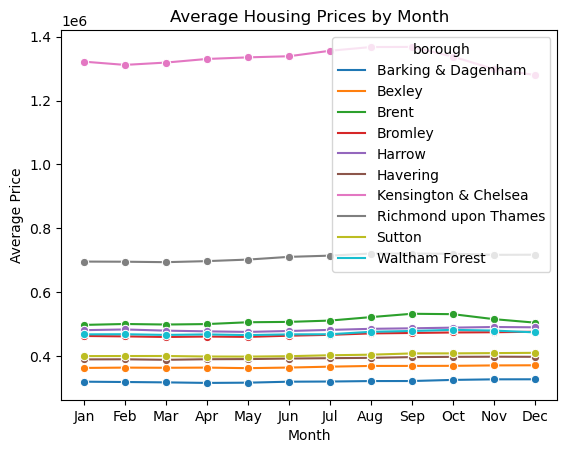

In [45]:
# plot the coef_var data using a line plot
sns.lineplot(data=highest_var_boroughs, x='month', y='avg_price', hue='borough', marker='o')

# format plot
plt.title(f'Average Housing Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Due to the large price differences between the 10 boroughs I selected, I want to look at this chart for each individual borough instead. 

I also don't want the changes month-to-month to be misleading, so I will create a function that will set the minimum price for each graph to get a more representatative visualization of the data. 

/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


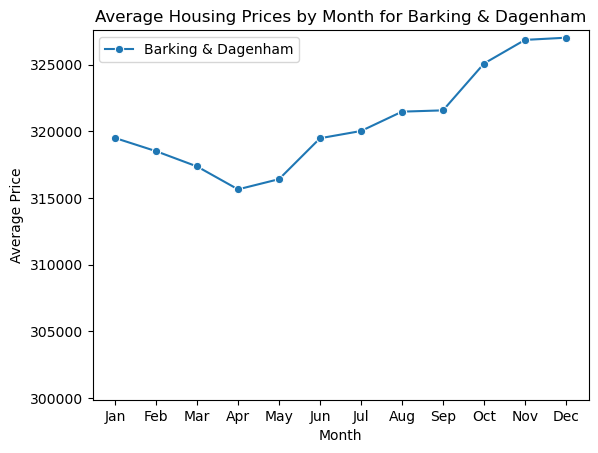

/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


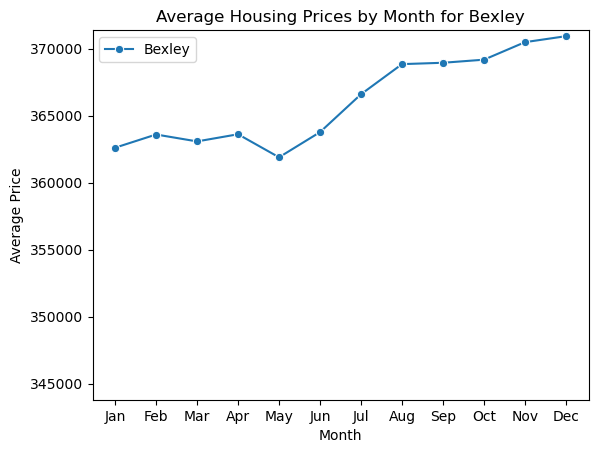

/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


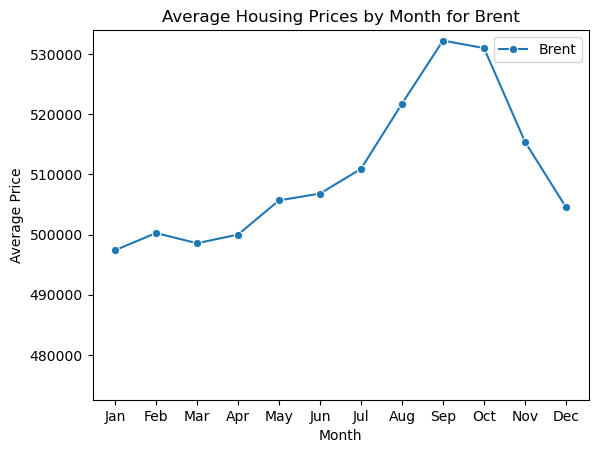

/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


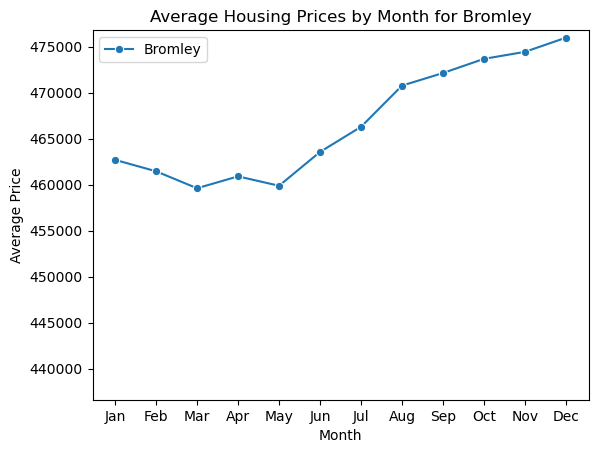

/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


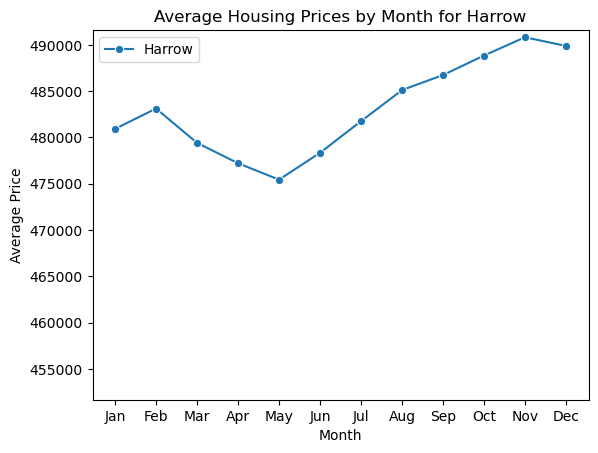

/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


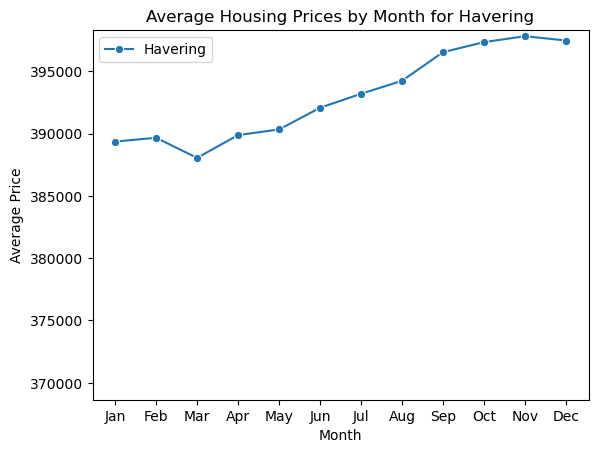

/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


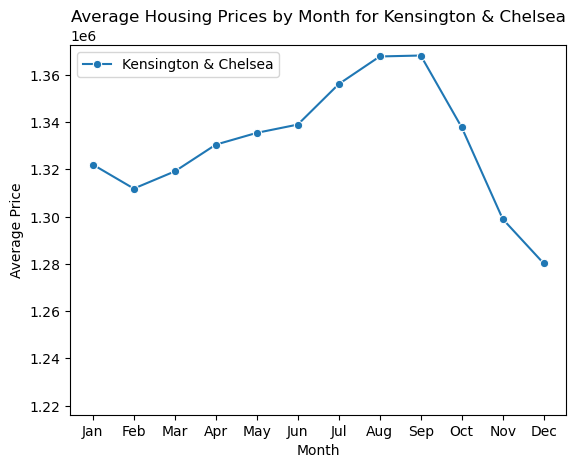

/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


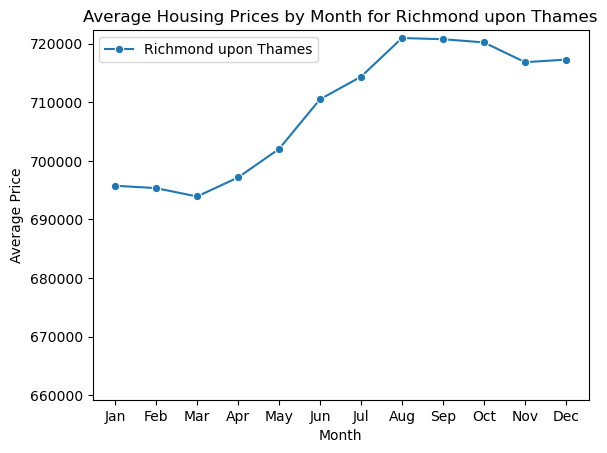

/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


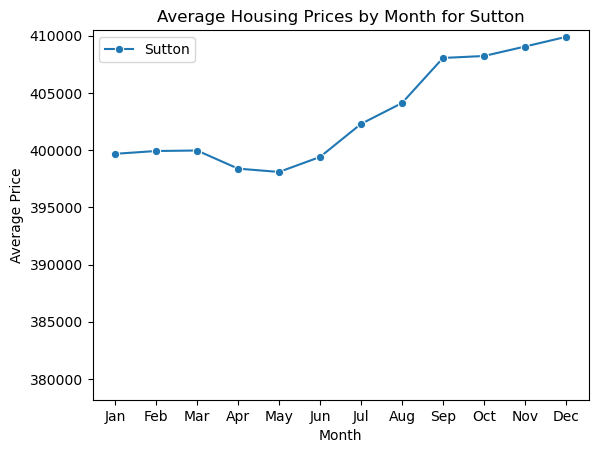

/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katialopes-gilbert/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


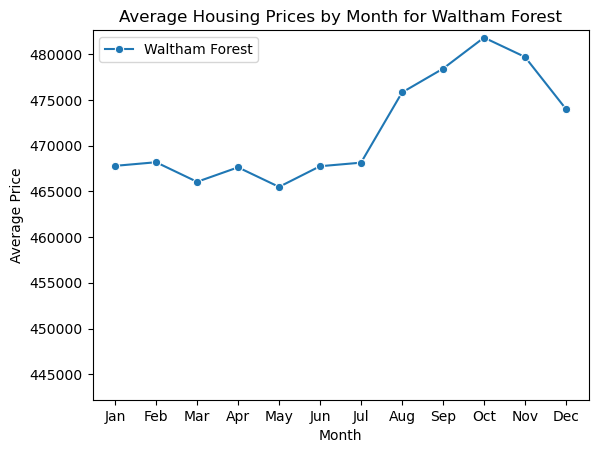

In [46]:
# Example: Dynamically setting the y-axis to start slightly lower than the minimum avg_price
def get_min_price(borough_name, df):
    borough_data = df[df['borough'] == borough_name]
        
    min_price = df['avg_price'].min()

    return min_price

for borough in highest_var_boroughs['borough'].unique():
    # filter data for the specified borough
    borough_data = highest_var_boroughs[highest_var_boroughs['borough'] == borough]

    # get the minimum price for each borough 
    min_price = get_min_price(borough, borough_data)

    # create a line plot that shows the borough's average price each month aggregated over 5 years
    sns.lineplot(data=borough_data, x='month', y='avg_price', marker='o', label=borough)

    # format the line plot
    plt.title(f'Average Housing Prices by Month for {borough}')
    plt.xlabel('Month')
    plt.ylabel('Average Price')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.ylim(bottom=(min_price - (min_price*0.05)))  # Start 10% lower than the minimum
    plt.show()

### 4. Conclusion

***Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***

Interestingly, the most expensive buroughs were not the boroughs that experienced the greatest increase in housing prices on average over the decades. 

The top 5 boroughs for biggest increases in housing prices from 1995 to 2023 were:
1. Hackney
2. Southwark
3. Waltham Forest
4. Lambeth
5. Lewisham

The top 5 most expensive boroughs in 2023 were:
1. Kensington & Chelsea
2. Camden
3. Richmond upon Thames
4. Hammersmith & Fulham
5. Islington

### Why calculate the price ratio?

There are several reasons one should consider calculating the Price Ratio over time when looking at home prices. 
1. Measure of Growth: A lower ratio (significantly less than 1) indicates substantial growth in housing prices over the period. It means that prices in Year 2 are much higher compared to Year 1. Conversely, a ratio closer to 1 suggests that prices have not grown as much.
2. Comparative Analysis: By comparing ratios across boroughs, you can identify which areas have experienced higher growth rates. This can be particularly useful for investors, policymakers, or anyone interested in the housing market's dynamics.
3. Affordability Insights: For potential homebuyers, understanding which boroughs have seen significant price increases can signal areas that might be becoming less affordable. Conversely, areas with lower growth might offer more affordable options.
4. Market Trends: The price ratio can also reflect broader market trends, such as the impact of economic factors, changes in demand and supply, and government policies on housing prices in different areas.
5. Investment Decisions: For investors, the price ratio can help identify boroughs with strong growth potential. A borough with a rapidly increasing ratio might be seen as a good area for investment, assuming the growth trend continues.

Given this, those interested in affordable, yet up-and-coming neighborhoods should consider purchasing a home in the top 5 boroughs that experienced the greatest change in home price over the last few decades. These homes had much lower average home prices in 2023 compared to the most expensive neighborhoods. The top 5 most expensive homes have an average price of 870,244 pounds vs 533,669 pounds for 5 boroughs that saw the highest average price increase. 

In contrast, those who are not intersted in experiencing other incraeses, such as property taxes, due to increased home prices would be wise to avoid these ten boroughs altogether, as they are expensive now, or might be in the future. 

# Future Work

I found a tutorial for creating an interactive plot to visualize rank with plotly. Time permitting, I may want to try this on the London Housing dataset in the future. It would be a great way to see how housing prices have shifted over time. 